In [1]:
from tqdm import tqdm
import pickle
import pandas as pd
import numpy as np

import torch
from torch.nn import functional as F

import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

from torch_geometric_temporal.nn.recurrent import DCRNN, TGCN, EvolveGCNO
from torch_geometric_temporal.signal import temporal_signal_split

In [2]:
with open('/data/vkharchuk/snc_organic_91d_STGCN/data/data_voice_prepared.pkl', 'rb') as f:
    data_voice = pickle.load(f)

X_train = data_voice['X_train']
y_train = data_voice['y_train']
normalisation_vector_train = data_voice['normalisation_vector_train']

X_val = data_voice['X_val']
y_val = data_voice['y_val']
normalisation_vector_val = data_voice['normalisation_vector_val']

print(X_train.shape, y_train.shape, normalisation_vector_train.shape, X_val.shape, y_val.shape, normalisation_vector_val.shape)

(15502, 1, 91, 128) (15502, 128) (15502, 128) (1472, 1, 91, 128) (1472, 128) (1472, 128)


In [10]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import erdos_renyi_graph, to_networkx, from_networkx
import networkx as nx

In [11]:
edge_index = erdos_renyi_graph(50, edge_prob=0.2)
x = torch.randn(50, 64)
edge_attr = torch.randn(edge_index.size(1), 32)
data = Data(edge_index=edge_index, x=x, edge_attr=edge_attr)
print(data)

Data(x=[50, 64], edge_index=[2, 482], edge_attr=[482, 32])


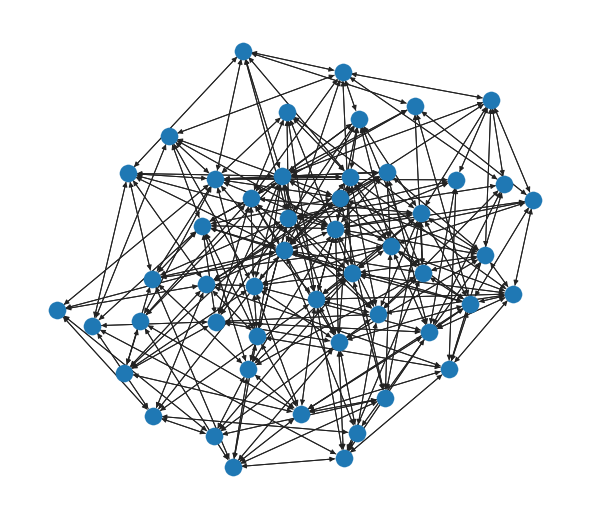

In [12]:
G = to_networkx(data, node_attrs=['x'], edge_attrs=['edge_attr'])
nx.draw(G)

In [13]:
data = from_networkx(G)
print(data)

Data(x=[50, 64], edge_index=[2, 482], edge_attr=[482, 32])


In [16]:
data.edge_attr

tensor([[-0.6360,  1.2654,  0.0993,  ..., -0.5427,  0.3055,  0.3197],
        [-0.4246, -1.3657, -0.3188,  ...,  0.4552, -2.5815,  0.9757],
        [-0.0634, -0.9298, -0.8929,  ...,  1.0148,  1.3071,  0.1020],
        ...,
        [ 0.3642, -0.2556, -0.2362,  ...,  0.6117,  0.2737, -0.1766],
        [ 0.0249,  0.5518,  0.2832,  ..., -1.1533, -2.8458, -0.1178],
        [-1.0948,  1.3647,  1.7767,  ..., -0.2875, -0.7842, -0.2671]])

In [18]:
data.edge_index.shape

torch.Size([2, 482])

In [20]:
data.x.shape

torch.Size([50, 64])